<a href="https://colab.research.google.com/github/adityahridaysahu/Solar-Physics-Data-Analysis-using-Python/blob/main/SunPy_Demo_Full_Sun__Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install reproject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.9/197.9 kB 12.7 MB/s eta 0:00:00


In [2]:
!pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install "sunpy[all]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import sunpy.map
import sunpy.sun
from sunpy.coordinates import get_body_heliographic_stonyhurst
from sunpy.data.sample import AIA_193_JUN2012, STEREO_A_195_JUN2012, STEREO_B_195_JUN2012

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20120601_000007_0193_lowres.fits:   0%|          | 0.00/996k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20120601_000530_n4eua.fits:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20120601_000530_n4eub.fits:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

In [6]:
maps = sunpy.map.Map(sorted([AIA_193_JUN2012, STEREO_A_195_JUN2012, STEREO_B_195_JUN2012]))

In [7]:
maps = [m.resample((1024, 1024)*u.pix) for m in maps]

In [8]:
maps[0].meta['rsun_ref'] = sunpy.sun.constants.radius.to_value(u.m)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


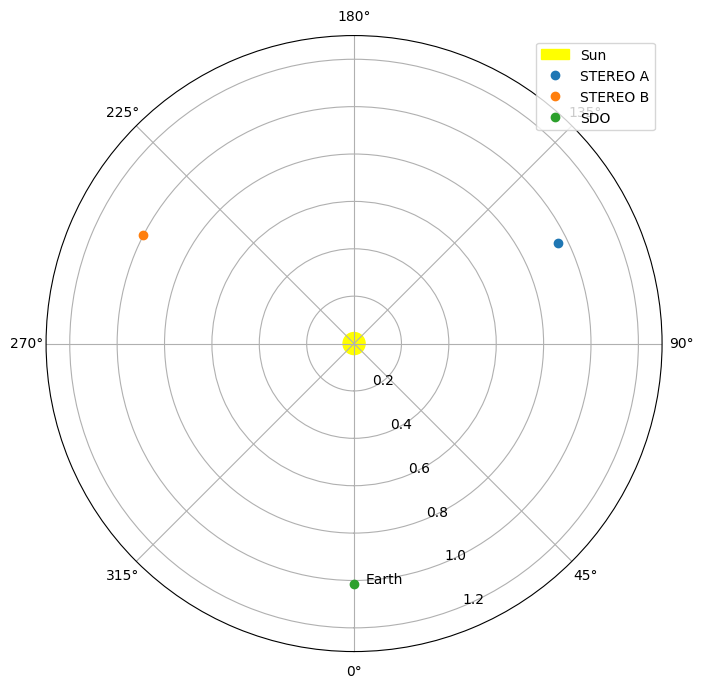

In [9]:
earth = get_body_heliographic_stonyhurst('earth', maps[0].date)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='polar')
circle = plt.Circle((0.0, 0.0), (10*u.Rsun).to_value(u.AU),
                    transform=ax.transProjectionAffine + ax.transAxes, color="yellow",
                    alpha=1, label="Sun")
ax.add_artist(circle)
ax.text(earth.lon.to_value("rad")+0.05, earth.radius.to_value(u.AU), "Earth")

for this_satellite, this_coord in [(m.observatory, m.observer_coordinate) for m in maps]:
    ax.plot(this_coord.lon.to('rad'), this_coord.radius.to(u.AU), 'o', label=this_satellite)

ax.set_theta_zero_location("S")
ax.set_rlim(0, 1.3)
ax.legend()

plt.show()

In [10]:
shape_out = (180, 360)  # This is set deliberately low to reduce memory consumption
header = sunpy.map.make_fitswcs_header(shape_out,
                                       SkyCoord(0, 0, unit=u.deg,
                                                frame="heliographic_stonyhurst",
                                                obstime=maps[0].date),
                                       scale=[360 / shape_out[1],
                                              180 / shape_out[0]] * u.deg / u.pix,
                                       wavelength=int(maps[0].meta['wavelnth']) * u.AA,
                                       projection_code="CAR")
out_wcs = WCS(header)

In [11]:
array, footprint = reproject_and_coadd(maps, out_wcs, shape_out, reproject_function=reproject_interp)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


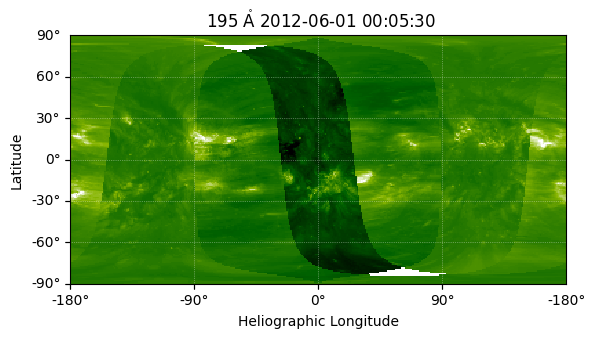

In [12]:
outmap = sunpy.map.Map((array, header))
outmap.plot_settings = maps[0].plot_settings

plt.figure()
outmap.plot()

plt.show()

In [13]:
coordinates = tuple(map(sunpy.map.all_coordinates_from_map, maps))

In [14]:
weights = [coord.transform_to("heliocentric").z.value for coord in coordinates]

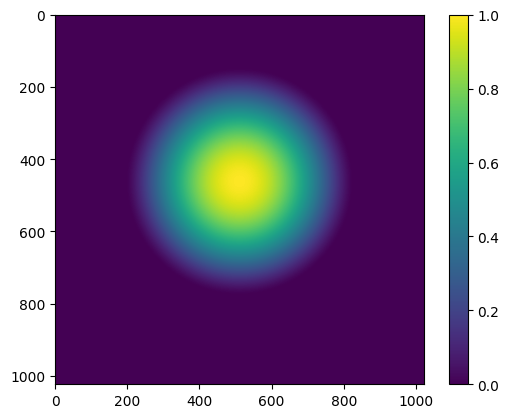

In [15]:
weights = [(w / np.nanmax(w)) ** 3 for w in weights]
for w in weights:
    w[np.isnan(w)] = 0

plt.figure()
plt.imshow(weights[0])
plt.colorbar()

plt.show()

In [16]:
array, _ = reproject_and_coadd(maps, out_wcs, shape_out,
                               input_weights=weights,
                               reproject_function=reproject_interp,
                               match_background=True,
                               background_reference=0)

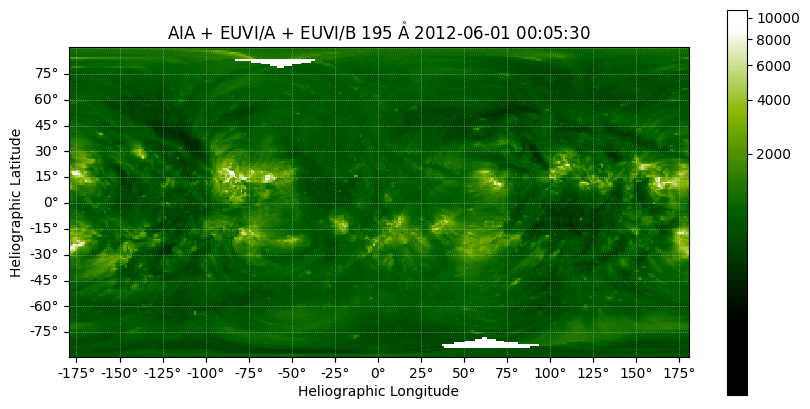

In [17]:
outmap = sunpy.map.Map((array, header))
outmap.plot_settings = maps[0].plot_settings
outmap.nickname = 'AIA + EUVI/A + EUVI/B'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=out_wcs)
im = outmap.plot(axes=ax, vmin=400)

lon, lat = ax.coords
lon.set_coord_type("longitude")
lon.coord_wrap = 180
lon.set_format_unit(u.deg)
lat.set_coord_type("latitude")
lat.set_format_unit(u.deg)

lon.set_axislabel('Heliographic Longitude', minpad=0.8)
lat.set_axislabel('Heliographic Latitude', minpad=0.9)
lon.set_ticks(spacing=25*u.deg, color='k')
lat.set_ticks(spacing=15*u.deg, color='k')

plt.colorbar(im, ax=ax)

# Reset the view to pixel centers
_ = ax.axis((0, shape_out[1], 0, shape_out[0]))

plt.show()